For video tutorial, go to https://youtu.be/KTeVOb8gaD4?list=PLQVvvaa0QuDd0flgGphKCej-9jp-QdzZ3

###Basic Setup and Test - Character Recognition

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import numpy as np
from sklearn import datasets
from sklearn import svm
import re

In [2]:
digits = datasets.load_digits()
digits.data.shape

(1797, 64)

In [3]:
clf = svm.SVC(C = 100, gamma = 0.001)

In [4]:
X,y = digits.data[:-1], digits.target[:-1]
# The last instance is held out for testing
clf.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

Prediction: [8]


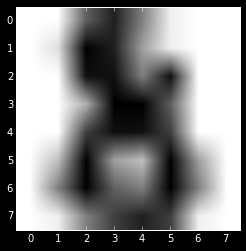

In [5]:
print('Prediction:',clf.predict(digits.data[-1]))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)

In [6]:
X_train,y_train = digits.data[:-10], digits.target[:-10]
clf.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [7]:
X_test,y_test = digits.data[-10:], digits.target[-10:]
clf.predict(X_test)

array([5, 4, 8, 8, 4, 9, 0, 8, 9, 8])

In [8]:
print(y_test)

[5 4 8 8 4 9 0 8 9 8]


In [9]:
np.mean(clf.predict(X_test) == y_test)

1.0

##Obtaining data

If you scrape super fast, the company might sue you for doing DoS attack. So, be careful. Even ask the company for data

Important Features  
P/E Ratio - Price to earnings ratio  
Debt to Equity Ratio  
Stock price

Import the data

In [10]:
import pandas as pd
import os
import time
from datetime import datetime

could not convert string to float: 'N/A' a 20090802054624.html
could not convert string to float: '<span id="yfs_l10_a">40.79</span>' a 20110802064537.html
40.79
could not convert string to float: '<span id="yfs_l10_a">37.74</span>' a 20111108050416.html
37.74
could not convert string to float: 'N/A' aa 20090309181750.html
could not convert string to float: '<span id="yfs_l10_aa">12.04</span>' aa 20110903092123.html
12.04
could not convert string to float: '<span id="yfs_l10_aa">10.70</span>' aa 20111102220447.html
10.7
could not convert string to float: '<span id="yfs_l10_aa">10.93</span>' aa 20111105212924.html
10.93
could not convert string to float: '<span id="yfs_l10_aa">8.65</span>' aa 20120102194206.html
8.65
list index out of range aapl 20060203134959.html
0.0
list index out of range aapl 20060207091730.html
0.0
list index out of range aapl 20060217150101.html
0.0
could not convert string to float: 'N/A' aapl 20070217215203.html
could not convert string to float: 'N/A' aapl 200

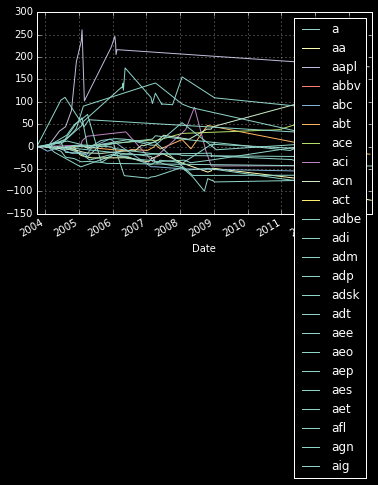

In [21]:
path ='IntraQuarter'
def Key_Stats(gather='Total Debt/Equity (mrq)'):
    statspath = path+'/_KeyStats'
    stock_list = [x[0] for x in os.walk(statspath)]
    df = pd.DataFrame(columns = ['Date','Unix','Ticker','DE Ratio','Price',
                                 'stock_p_change','SP500','sp500_p_change','difference'])
    sp500_df = pd.DataFrame.from_csv('YAHOO-INDEX_GSPC.csv')
    ticker_list=[]
    
    for each_dir in stock_list[1:25]:
        each_file = os.listdir(each_dir)
        ticker = each_dir.split('/')[2]
        ticker_list.append(ticker)
        
        starting_stock_value = False
        starting_sp500_value = False
        
        if len(each_file) > 0:
            for file in each_file:
                date_stamp = datetime.strptime(file,'%Y%m%d%H%M%S.html')
                unix_time = time.mktime(date_stamp.timetuple())
                source = open(each_dir+'/'+file).read()
                try:
                    try:
                        value = float(source.split(gather+':</td><td class="yfnc_tabledata1">')[1].split('</td>')[0])
                    except Exception as e:
                        print(e,ticker,file)
                        value = float(source.split(gather+':</td>\n<td class="yfnc_tabledata1">')[1].split('</td>')[0])
                        print(value)
                    
                    try:
                        sp500_date = datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row = sp500_df.ix[sp500_date]
                        sp500_value = float(row["Adjusted Close"])
                    except:
                        sp500_date = datetime.fromtimestamp(unix_time - 259200).strftime('%Y-%m-%d')
                        row = sp500_df.ix[sp500_date]
                        sp500_value = float(row["Adjusted Close"])
                    
                    try:
                        stock_price = float(source.split('</small><big><b>')[1].split('</b')[0])
                    except Exception as e:
                        try:
                            stock_price = (source.split('</small><big><b>')[1].split('</b')[0])
                            stock_price = re.search(r'(\d{1,8}\.\d{1,8})',stock_price)
                            stock_price = float(stock_price.group(1))
                            print(e, ticker, file)
                            print(stock_price)
                        except:
                            pass
                        
                    if not starting_stock_value:
                        starting_stock_value = stock_price
                    if not starting_sp500_value:
                        starting_sp500_value = sp500_value
                    
                    stock_p_change = 100 * (stock_price - starting_stock_value)/starting_stock_value
                    sp500_p_change = 100 * (sp500_value - starting_sp500_value)/starting_sp500_value
                    
                    
                    df = df.append({'Date':date_stamp, 
                                    'Unix':unix_time, 
                                    'Ticker':ticker, 
                                    'DE Ratio':value,
                                    'Price':stock_price,
                                    'stock_p_change':stock_p_change,
                                    'SP500':sp500_value,
                                    'sp500_p_change':sp500_p_change,
                                    'difference':stock_p_change - sp500_p_change}, ignore_index = True)
                except Exception as e:
                    pass
                
                #print(ticker,':',value)
    for each_ticker in ticker_list:
        try:
            plot_df = df[df['Ticker'] == each_ticker]
            plot_df = plot_df.set_index(['Date'])
            plot_df['difference'].plot(label=each_ticker)
            plt.legend()
        except:
            pass
    save = gather.replace('/','').replace(' ','').replace(')','').replace('(','')+('.csv')
    print(save)
    df.to_csv(save)
Key_Stats()

In [12]:
df1 = pd.DataFrame(columns=['a','b'])
df1 = df1.append({'a':1,'b':2}, ignore_index=True)
df1

,a,b
0,1,2


In [13]:
print([x[0] for x in os.walk(path+'/_KeyStats')])

['IntraQuarter/_KeyStats', 'IntraQuarter/_KeyStats/a', 'IntraQuarter/_KeyStats/aa', 'IntraQuarter/_KeyStats/aapl', 'IntraQuarter/_KeyStats/abbv', 'IntraQuarter/_KeyStats/abc', 'IntraQuarter/_KeyStats/abt', 'IntraQuarter/_KeyStats/ace', 'IntraQuarter/_KeyStats/aci', 'IntraQuarter/_KeyStats/acn', 'IntraQuarter/_KeyStats/act', 'IntraQuarter/_KeyStats/adbe', 'IntraQuarter/_KeyStats/adi', 'IntraQuarter/_KeyStats/adm', 'IntraQuarter/_KeyStats/adp', 'IntraQuarter/_KeyStats/adsk', 'IntraQuarter/_KeyStats/adt', 'IntraQuarter/_KeyStats/aee', 'IntraQuarter/_KeyStats/aeo', 'IntraQuarter/_KeyStats/aep', 'IntraQuarter/_KeyStats/aes', 'IntraQuarter/_KeyStats/aet', 'IntraQuarter/_KeyStats/afl', 'IntraQuarter/_KeyStats/agn', 'IntraQuarter/_KeyStats/aig', 'IntraQuarter/_KeyStats/aiv', 'IntraQuarter/_KeyStats/aiz', 'IntraQuarter/_KeyStats/akam', 'IntraQuarter/_KeyStats/all', 'IntraQuarter/_KeyStats/altr', 'IntraQuarter/_KeyStats/alxn', 'IntraQuarter/_KeyStats/amat', 'IntraQuarter/_KeyStats/amd', 'IntraQu